### Load data
.parquet-files can be loaded

either whole directory or single file into list consisting of dataframes with one column (i.e. time series) each

In [1]:
from utils import load_parquet_to_df_list


path = "../../../../0_data/synth_pattern_data_for_synth_drive_generation"
df_list = load_parquet_to_df_list(path)

# do not use metadata of time series
df_orig = [df["dim_0"].to_frame() for df in df_list]

In [2]:
df_orig[0]

,dim_0
0,70.902463
1,70.282942
2,68.703804
3,64.193219
4,60.321183
...,...
896,79.357289
897,88.933892
898,83.036114
899,85.052833


### Z-normalize data

In [3]:
from utils import z_normalize


# additionally cut of some time series for a shorter representation
df_norm = [z_normalize(df) for df in df_orig[:3]]
num_dfs = len(df_norm)

### Random Projection - Find Motifs

### Params for Random Projection

In [4]:
from discretization.sax.sax import SAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.persist.persist import Persist


alphabet_size = 8
alphabet_size_slope = 8

sax = SAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size, alphabet_size_slope)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
persist = Persist(alphabet_size)

sax_variant = sax
len_subsequence = 20
window_size = 5
num_projections = 20
mask_size = 2
# set radius very high ('inf') to evaluate only the impact of the respective symbolic representation
radius = 5
# reduce search space based on collisions of two symbolic representations
# should be lower for 1d-SAX and eSAX to account for more than one symbol per segment for better comparability with SAX and aSAX
# lower it for larger motifs, because both queries need a high number of collisions with subsequence under investigation
min_collisions = 13
ignore_trivial = False
exclusion_zone = None

In [5]:
from pattern_recognition.motif_discovery.random_projection.random_projection import do_random_projection


motifs = [do_random_projection(df_norm_ts, len_subsequence, window_size, sax_variant, num_projections, mask_size, radius, min_collisions, ignore_trivial, exclusion_zone)
          for df_norm_ts in [df_norm[0]]]

In [6]:
motifs_lst, start, end = motifs[0]
motifs_lst

[[[0, 63, 159, 422, 475, 727],
  [1, 64, 200],
  [2, 65],
  [3, 4, 66, 67, 161, 162, 424, 425, 477, 478, 729, 836, 837],
  [6, 69],
  [7, 70],
  [8, 9, 72, 73, 166, 429, 430, 482, 483, 734, 841],
  [10, 11, 168, 207, 431, 667, 736, 777, 843],
  [12, 169, 208, 209, 668, 737, 779, 844],
  [13, 14, 171, 433, 434, 435, 487, 488, 738, 739, 781, 846],
  [15, 173, 671],
  [16, 212, 436, 672, 741, 782, 848],
  [17, 174, 213, 673, 742, 849],
  [18, 175, 438, 439, 492, 493, 674, 743, 850],
  [19, 675, 851],
  [21, 677, 787],
  [22, 218, 678],
  [23, 443, 444, 498, 499, 679, 748],
  [24, 680, 750],
  [26, 447, 682],
  [27, 223, 448, 449, 503, 683, 684],
  [28, 504, 753],
  [29, 505],
  [31, 757],
  [33, 758],
  [36, 381],
  [37, 309, 533],
  [38, 310, 534],
  [39, 313, 385, 536, 537],
  [40, 384],
  [41, 42, 314, 386, 538],
  [43, 96, 315, 387, 588, 589, 869],
  [44, 98, 541, 542, 585, 590, 592, 867, 872],
  [45, 97, 99, 100, 389, 591, 868, 871],
  [46, 93, 101, 130, 631],
  [47,
   50,
   102,
 

### Highlight motif within time series

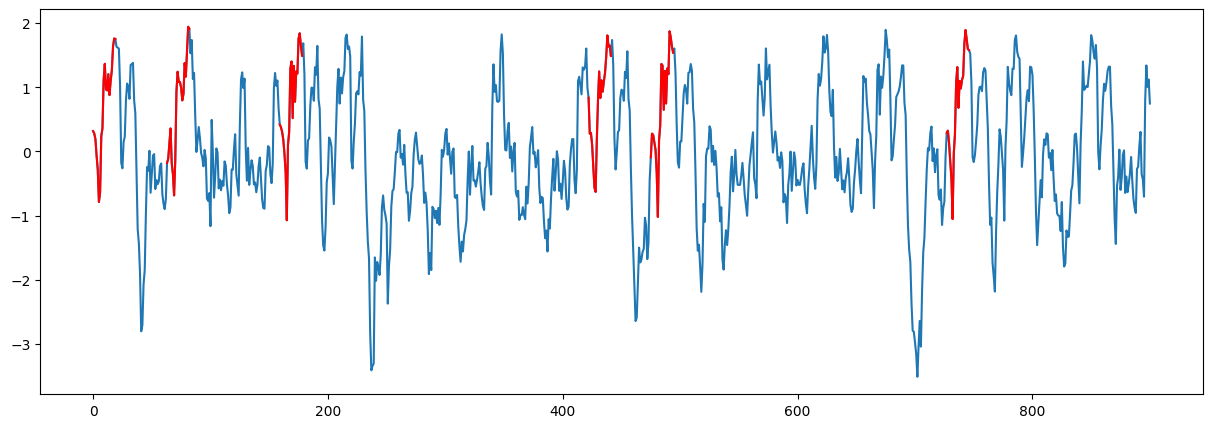

In [7]:
from pattern_recognition.motif_discovery.graphics import highlight_motif


highlight_motif(df_norm[0], start, end, motifs_lst[0][0], 0)

### Get motif per subsequence

In [8]:
from pattern_recognition.motif_discovery.utils import get_motifs_per_subsequence


motifs_subsequence_lst = [get_motifs_per_subsequence(motifs_lst[0]) for motifs_lst in motifs]

In [9]:
motifs_subsequence_lst[0]

[{0: [63, 159, 422, 475, 727],
  1: [64, 200],
  2: [65],
  3: [4, 66, 67, 161, 162, 424, 425, 477, 478, 729, 836, 837],
  4: [3, 66, 67, 161, 162, 424, 425, 477, 478, 729, 836, 837],
  6: [69],
  7: [70],
  8: [9, 72, 73, 166, 429, 430, 482, 483, 734, 841],
  9: [8, 72, 73, 166, 429, 430, 482, 483, 734, 841],
  10: [11, 168, 207, 431, 667, 736, 777, 843],
  11: [10, 168, 207, 431, 667, 736, 777, 843],
  12: [169, 208, 209, 668, 737, 779, 844],
  13: [14, 171, 433, 434, 435, 487, 488, 738, 739, 781, 846],
  14: [13, 171, 433, 434, 435, 487, 488, 738, 739, 781, 846],
  15: [173, 671],
  16: [212, 436, 672, 741, 782, 848],
  17: [174, 213, 673, 742, 849],
  18: [175, 438, 439, 492, 493, 674, 743, 850],
  19: [675, 851],
  21: [677, 787],
  22: [218, 678],
  23: [443, 444, 498, 499, 679, 748],
  24: [680, 750],
  26: [447, 682],
  27: [223, 448, 449, 503, 683, 684],
  28: [504, 753],
  29: [505],
  31: [757],
  33: [758],
  36: [381],
  37: [309, 533],
  38: [310, 534],
  39: [313, 385, 5

### Remove trivial motifs for each subsequnce
Given a subsequence 'S' with index 'a'. A trivial motif of 'S' is a motif of 'S' with index 'k' and all subsequences with indexes between 'a' and 'k' are motifs of 'S' as well. Intuitively, a motif that is near 'S' is not a trivial motif of 'S' if and only if there is at least one subsequence between them that is not a motif of 'S'.

In [10]:
from pattern_recognition.motif_discovery.utils import remove_trivial_motifs_per_subsequence


removed = [remove_trivial_motifs_per_subsequence(motifs_subsequence) for motifs_subsequence in motifs_subsequence_lst]

In [11]:
removed[0]

[{0: [63, 159, 422, 475, 727],
  1: [64, 200],
  2: [65],
  3: [66, 67, 161, 162, 424, 425, 477, 478, 729, 836, 837],
  4: [66, 67, 161, 162, 424, 425, 477, 478, 729, 836, 837],
  6: [69],
  7: [70],
  8: [72, 73, 166, 429, 430, 482, 483, 734, 841],
  9: [72, 73, 166, 429, 430, 482, 483, 734, 841],
  10: [168, 207, 431, 667, 736, 777, 843],
  11: [168, 207, 431, 667, 736, 777, 843],
  12: [169, 208, 209, 668, 737, 779, 844],
  13: [171, 433, 434, 435, 487, 488, 738, 739, 781, 846],
  14: [171, 433, 434, 435, 487, 488, 738, 739, 781, 846],
  15: [173, 671],
  16: [212, 436, 672, 741, 782, 848],
  17: [174, 213, 673, 742, 849],
  18: [175, 438, 439, 492, 493, 674, 743, 850],
  19: [675, 851],
  21: [677, 787],
  22: [218, 678],
  23: [443, 444, 498, 499, 679, 748],
  24: [680, 750],
  26: [447, 682],
  27: [223, 448, 449, 503, 683, 684],
  28: [504, 753],
  29: [505],
  31: [757],
  33: [758],
  36: [381],
  37: [309, 533],
  38: [310, 534],
  39: [313, 385, 536, 537],
  40: [384],
  41: